In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import glob
import os
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import datetime
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [6]:
path ="/data/disang/WRF/0318/"
pdir ="/data/disang/WRF/data/cauoc/im/"

filelist = glob.glob(os.path.join(path,'wrfout_d01_2018-05*'))

l1 = len(filelist)
n = -1
toutput_a1 = np.zeros((l1,519,501), dtype=np.float32)

0


/tmp/ipykernel_412175/4006510995.py:80: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb3 = plt.colorbar(im, cmap=cmap1,fraction=0.034, pad=0.038,aspect=30,extend='max',
/tmp/ipykernel_412175/4006510995.py:80: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb3 = plt.colorbar(im, cmap=cmap1,fraction=0.034, pad=0.038,aspect=30,extend='max',


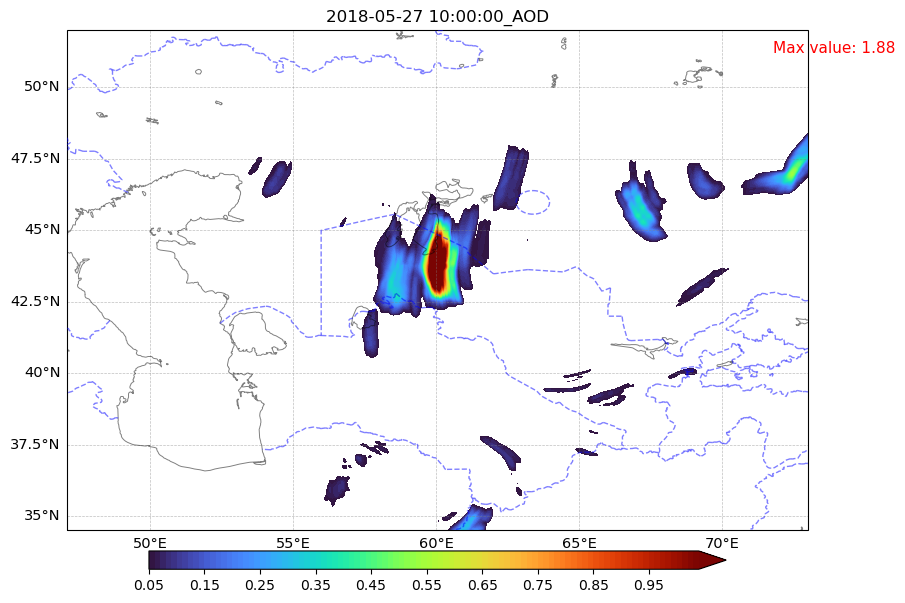

In [7]:
for file in filelist:
    filename = os.path.basename(file)
    time = datetime.datetime.strptime(filename.split('d01_')[1],'%Y-%m-%d_%H:%M:%S')
    # orbit = filename.split('-')[3][0:6]
    n = n + 1
    print(str(n))


    with Dataset(file, mode='r') as ncfile:

        # Extract the pressure, geopotential height, and wind variables
        lats  = ncfile["XLAT"][0,:,:]
        lons  = ncfile["XLONG"][0,:,:]
        ###emis dust bins with unit of (kg/cell) 
        ph  = ncfile.variables["PH"][0,:,:,:]
        phb  = ncfile.variables["PHB"][0,:,:,:]
        ht = ncfile.variables["HGT"][0,:,:]
        e1 = ncfile.variables["EXTCOF55"][0,:,:,:] 

        ### geopotential height
        th = (ph+phb)/9.81
        ### layer thickness
        dth = np.diff(th,axis = 0)

        ### AOD
        ao = dth * e1
        aod = np.sum(ao, axis=0)
        aod1 = aod/1000
        mx = np.nanmax(aod1)
        mx1 = str(round(mx, 2))
        
        
        fig = plt.figure(figsize=(12,7))
        
        cmap1 = mpl.cm.turbo
        #cmap1 = mpl.cm.RdYlBu_r


        ###
        p = ccrs.LambertConformal(central_longitude=47.177, central_latitude=50.893)
        # projection = ccrs.LambertConformal(central_longitude=np.mean(bounds_lon), \
        #                             central_latitude=np.mean(bounds_lat))

        ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
        #ax.set_extent([40, 90, 30, 60], crs=ccrs.PlateCarree())
        ####test domain
        #ax.set_extent([47.1, 70, 34.5, 52], crs=ccrs.PlateCarree())
        ax.set_extent([47.1, 73, 34.5, 52], crs=ccrs.PlateCarree())
        # ax.set_extent([48, 81.5, 34, 56], crs=ccrs.PlateCarree())
        # ax.set_extent([48, 56, 40, 48], crs=ccrs.PlateCarree())


        ### plot the frequency map
        levels = np.linspace(0.05, 1.05, num=100, endpoint=False)
        labels = levels


        im = ax.contourf(lons, lats, aod1,
                                  levels=levels,###vmin vamx
                                  cmap=cmap1,
                                  transform=ccrs.PlateCarree(), extend='max')

        ax.add_feature(cfeature.COASTLINE.with_scale('10m'),linewidth=.7,edgecolor='k',alpha=.5,zorder=100)
        # ax.add_feature(states_provinces,linewidth=.3,linestyle='--',edgecolor='k',alpha=.5,zorder=100)
        ax.add_feature(cfeature.LAKES.with_scale('10m'),linewidth=.7,facecolor='none',edgecolor='k',alpha=.5,zorder=100)
        ax.add_feature(cfeature.BORDERS.with_scale('10m'),color='blue',linewidth=1,linestyle='--',edgecolor='k',alpha=.5,zorder=100)
        # ax.set_title('Windspeed'+str(time),fontsize=14)
        ax.text(71.8,51.2,'Max value: '+ mx1,size=11, color='r',transform=ccrs.PlateCarree())

        gl = ax.gridlines(draw_labels=True,dms=True, x_inline=False, y_inline=False, linewidth=.5, color='gray', alpha=0.5, linestyle='--')

        gl.right_labels = False
        gl.top_labels = None
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.ylabel_style = {'size': 10.5,'color': 'black'}
        gl.xlabel_style = {'size': 10.5,'color': 'black','rotation':'horizontal','ha':'center'}
        ###,'verticalalignment':'center_baseline','rotation_mode':'anchor'

        cb3 = plt.colorbar(im, cmap=cmap1,fraction=0.034, pad=0.038,aspect=30,extend='max',
                                       orientation='horizontal')
        # cb3.set_label('wind speed')
        #cb3.tick_params(labelsize=11)
        #cb3.set_label('Total surface emission/kg m^-2',size=12)


        #plt.title("Daily mean AOD at 550nm 28 May 2018")
        plt.title(str(time)+"_AOD")
        plt.show()



        #plt.savefig(pdir+'aod28.png',bbox_inches="tight",dpi=800)
#         plt.savefig(pdir+'AFWA_'+'AOD_'+str(time)+'.png',bbox_inches="tight",dpi=600)
#         plt.close(fig)



In [21]:
tm =tain    
tm[tm ==0]=np.nan

mm1 = np.nanmax(toutput_a1)
mm = np.nanmax(tm)
print(mm)
print(mm1)

0.25613683
1.4027007


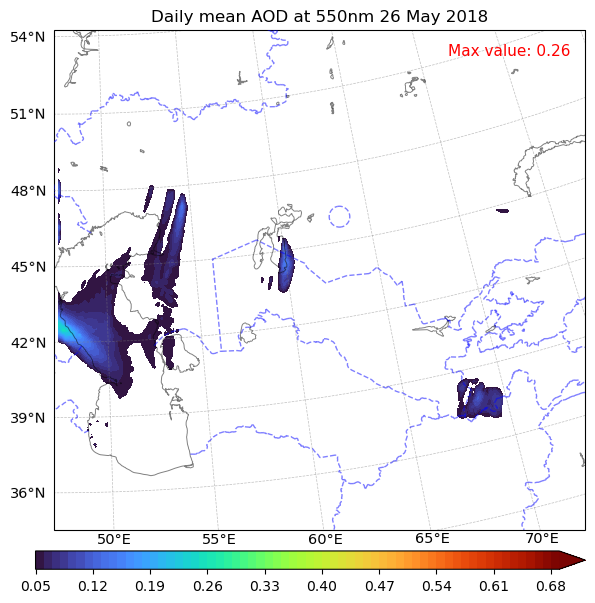

In [22]:
fig = plt.figure(figsize=(12,7))
        
cmap1 = mpl.cm.turbo
#cmap1 = mpl.cm.RdYlBu_r


###
p = ccrs.LambertConformal(central_longitude=47.177, central_latitude=50.893)
# projection = ccrs.LambertConformal(central_longitude=np.mean(bounds_lon), \
#                             central_latitude=np.mean(bounds_lat))

ax = fig.add_subplot(1, 1, 1, projection=p)
#ax.set_extent([40, 90, 30, 60], crs=ccrs.PlateCarree())
####test domain
#ax.set_extent([47.1, 70, 34.5, 52], crs=ccrs.PlateCarree())
ax.set_extent([47.1, 73, 34.5, 52], crs=ccrs.PlateCarree())
# ax.set_extent([48, 81.5, 34, 56], crs=ccrs.PlateCarree())
# ax.set_extent([48, 56, 40, 48], crs=ccrs.PlateCarree())


### plot the frequency map
levels = np.linspace(0.05, 0.7, num=65, endpoint=False)
labels = levels


im = ax.contourf(lons, lats, tm,
                          levels=levels,###vmin vamx
                          cmap=cmap1,
                          transform=ccrs.PlateCarree(), extend='max')

ax.add_feature(cfeature.COASTLINE.with_scale('10m'),linewidth=.7,edgecolor='k',alpha=.5,zorder=100)
# ax.add_feature(states_provinces,linewidth=.3,linestyle='--',edgecolor='k',alpha=.5,zorder=100)
ax.add_feature(cfeature.LAKES.with_scale('10m'),linewidth=.7,facecolor='none',edgecolor='k',alpha=.5,zorder=100)
ax.add_feature(cfeature.BORDERS.with_scale('10m'),color='blue',linewidth=1,linestyle='--',edgecolor='k',alpha=.5,zorder=100)
# ax.set_title('Windspeed'+str(time),fontsize=14)
ax.text(71.8,51.2,'Max value: 0.26',size=11, color='r',transform=ccrs.PlateCarree())

gl = ax.gridlines(draw_labels=True,dms=True, x_inline=False, y_inline=False, linewidth=.5, color='gray', alpha=0.5, linestyle='--')

gl.right_labels = False
gl.top_labels = None
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabel_style = {'size': 10.5,'color': 'black'}
gl.xlabel_style = {'size': 10.5,'color': 'black','rotation':'horizontal','ha':'center'}
###,'verticalalignment':'center_baseline','rotation_mode':'anchor'

cb3 = plt.colorbar(im, cmap=cmap1,fraction=0.034, pad=0.038,aspect=30,extend='max',
                               orientation='horizontal')
# cb3.set_label('wind speed')
#cb3.tick_params(labelsize=11)
#cb3.set_label('Total surface emission/kg m^-2',size=12)


plt.title("Daily mean AOD at 550nm 26 May 2018")



plt.savefig(pdir+'aod26.png',bbox_inches="tight",dpi=800)
#plt.close(fig)